<a href="https://colab.research.google.com/github/SnehalMalhotra/first_project/blob/master/notebook_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"snehalmalhotra","key":"2162662b2f4925f79c18aa6b2e318aef"}'}

In [3]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

In [4]:
!kaggle datasets download -d snehalmalhotra/food-items

100% 1.63G/1.63G [00:26<00:00, 61.9MB/s]
100% 1.63G/1.63G [00:26<00:00, 67.1MB/s]


In [5]:
!unzip "*.zip"

Streaming output truncated to the last 5000 lines.
  inflating: images/poutine/1028984.jpg  
  inflating: images/poutine/102911.jpg  
  inflating: images/poutine/1036670.jpg  
  inflating: images/poutine/1036842.jpg  
  inflating: images/poutine/1040500.jpg  
  inflating: images/poutine/1044856.jpg  
  inflating: images/poutine/1045400.jpg  
  inflating: images/poutine/1045905.jpg  
  inflating: images/poutine/1051467.jpg  
  inflating: images/poutine/1053328.jpg  
  inflating: images/poutine/105398.jpg  
  inflating: images/poutine/106693.jpg  
  inflating: images/poutine/10671.jpg  
  inflating: images/poutine/1069917.jpg  
  inflating: images/poutine/1070867.jpg  
  inflating: images/poutine/1080374.jpg  
  inflating: images/poutine/1080385.jpg  
  inflating: images/poutine/1081120.jpg  
  inflating: images/poutine/1084918.jpg  
  inflating: images/poutine/1088275.jpg  
  inflating: images/poutine/1092714.jpg  
  inflating: images/poutine/1095420.jpg  
  inflating: images/poutine/10

In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning, append=True)

In [7]:
bs=64

In [8]:
path=""
tfms = get_transforms()
data = ImageDataBunch.from_folder( Path("images"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms())

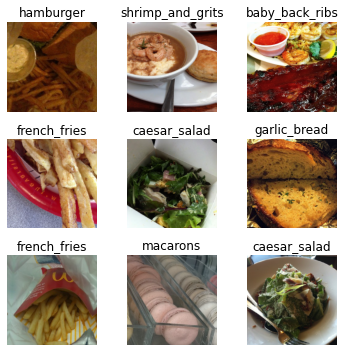

In [9]:
data.show_batch(rows=3, figsize=(5,5))

In [10]:
print(data.classes)
len(data.classes)

['baby_back_ribs', 'beef_carpaccio', 'caesar_salad', 'cannoli', 'caprese_salad', 'creme_brulee', 'cup_cakes', 'escargots', 'filet_mignon', 'french_fries', 'garlic_bread', 'hamburger', 'macarons', 'nachos', 'pad_thai', 'pancakes', 'poutine', 'ramen', 'shrimp_and_grits', 'spring_rolls', 'waffles']


21

In [11]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.088400,0.763167,0.772619,07:08
1,0.742226,0.531230,0.838810,06:58
2,0.532953,0.437561,0.871667,06:53
3,0.418263,0.416079,0.873095,06:53


In [13]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [14]:
os.mkdir("/content/drive/My Drive/Geeksman_AISquad_Project1_SNEHAL")

In [16]:
folder_name="/content/drive/My Drive/Geeksman_AISquad_Project1_SNEHAL"

In [17]:
learn.save(folder_name+"/Stage-1")

In [18]:
learn.unfreeze()

In [19]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.604413,0.394309,0.882619,07:32


In [24]:
learn.load("/content/drive/My Drive/Geeksman_AISquad_Project1_SNEHAL/Stage-1")

Learner(data=ImageDataBunch;

Train: LabelList (16800 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
shrimp_and_grits,shrimp_and_grits,shrimp_and_grits,shrimp_and_grits,shrimp_and_grits
Path: images;

Valid: LabelList (4200 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
hamburger,spring_rolls,beef_carpaccio,filet_mignon,creme_brulee
Path: images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1)

In [25]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


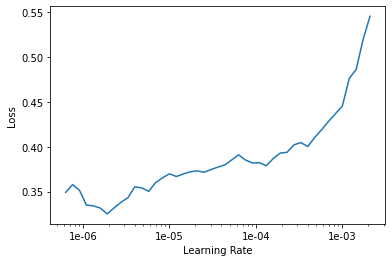

In [26]:
learn.recorder.plot()

In [27]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.377412,0.394196,0.879762,07:30
1,0.342199,0.367621,0.885476,07:25
2,0.303022,0.357062,0.890000,07:33
3,0.252869,0.354160,0.891667,07:29


In [28]:
learn.save(folder_name+"/Stage-2")

In [29]:
learn.load("/content/drive/My Drive/Geeksman_AISquad_Project1_SNEHAL/Stage-2")

Learner(data=ImageDataBunch;

Train: LabelList (16800 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
shrimp_and_grits,shrimp_and_grits,shrimp_and_grits,shrimp_and_grits,shrimp_and_grits
Path: images;

Valid: LabelList (4200 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
hamburger,spring_rolls,beef_carpaccio,filet_mignon,creme_brulee
Path: images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1)

In [30]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.254163,0.349531,0.892619,07:34
1,0.250267,0.341460,0.895238,07:32
2,0.212588,0.332193,0.899762,07:25
3,0.186534,0.330124,0.898571,07:24


In [31]:
learn.export(folder_name+"/export.pkl")